In [69]:
import pandas as pd

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

### Prerpocessing data

In [2]:
#training data
train_data = pd.read_csv('Census_income_train.csv')

In [3]:
train_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
len(train_data)

32560

In [5]:
train_data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

In [6]:
train_data["Workclass"].str.contains("\?")

<>:1: SyntaxWarning: invalid escape sequence '\?'
<>:1: SyntaxWarning: invalid escape sequence '\?'
/tmp/ipykernel_1888/3506139826.py:1: SyntaxWarning: invalid escape sequence '\?'
  train_data["Workclass"].str.contains("\?")


0        False
1        False
2        False
3        False
4        False
         ...  
32555    False
32556    False
32557    False
32558    False
32559    False
Name: Workclass, Length: 32560, dtype: bool

In [7]:
clean_train_data = train_data[train_data["Workclass"].str.contains("\?") == False]

<>:1: SyntaxWarning: invalid escape sequence '\?'
<>:1: SyntaxWarning: invalid escape sequence '\?'
/tmp/ipykernel_1888/2683323555.py:1: SyntaxWarning: invalid escape sequence '\?'
  clean_train_data = train_data[train_data["Workclass"].str.contains("\?") == False]


In [8]:
len(clean_train_data)

30724

In [9]:
clean_train_data = clean_train_data[clean_train_data["Occupation"].str.contains("\?") == False]

<>:1: SyntaxWarning: invalid escape sequence '\?'
<>:1: SyntaxWarning: invalid escape sequence '\?'
/tmp/ipykernel_1888/2800463678.py:1: SyntaxWarning: invalid escape sequence '\?'
  clean_train_data = clean_train_data[clean_train_data["Occupation"].str.contains("\?") == False]


In [10]:
len(clean_train_data)

30717

In [11]:
clean_train_data = clean_train_data[clean_train_data["Native-country"].str.contains("\?") == False]

<>:1: SyntaxWarning: invalid escape sequence '\?'
<>:1: SyntaxWarning: invalid escape sequence '\?'
/tmp/ipykernel_1888/657950967.py:1: SyntaxWarning: invalid escape sequence '\?'
  clean_train_data = clean_train_data[clean_train_data["Native-country"].str.contains("\?") == False]


In [12]:
len(clean_train_data)

30161

In [13]:
clean_train_data = clean_train_data.reset_index(drop = True)

In [19]:
clean_train_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
train_dummies = pd.get_dummies(clean_train_data, drop_first=False)

In [27]:
print(train_dummies.head())

   Age  fnlwgt  Education-num  Capital-gain  Capital-loss  Hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   Workclass_ Federal-gov  Workclass_ Local-gov  Workclass_ Private  \
0                   False                 False               False   
1                   False                 False               False   
2                   False                 False                True   
3                   False                 False                True   
4                   False                 False                True   

   Workclass_ Self-emp-inc  ...  Native-country_ Scotland  \
0                    False  ...                  

In [26]:
print(type(train_dummies))

<class 'pandas.core.frame.DataFrame'>


In [30]:
train_dummies =train_dummies.drop(['Income_ <=50K'], axis=1)

In [31]:
train_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ >50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,38,215646,9,0,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,53,234721,7,0,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,28,338409,13,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
train_input= train_dummies.iloc[:, :-1]
train_target = train_dummies.iloc[:,-1]

#### preparing test data

In [33]:
test_data = pd.read_csv('Census_income_test.csv')

In [34]:
test_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [36]:
len(test_data)

16281

In [37]:
test_data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

In [38]:
clean_test_data = test_data[test_data["Workclass"].str.contains("\?") == False]

<>:1: SyntaxWarning: invalid escape sequence '\?'
<>:1: SyntaxWarning: invalid escape sequence '\?'
/tmp/ipykernel_1888/4123045775.py:1: SyntaxWarning: invalid escape sequence '\?'
  clean_test_data = test_data[test_data["Workclass"].str.contains("\?") == False]


In [39]:
clean_test_data = test_data[test_data["Occupation"].str.contains("\?") == False]

<>:1: SyntaxWarning: invalid escape sequence '\?'
<>:1: SyntaxWarning: invalid escape sequence '\?'
/tmp/ipykernel_1888/152294665.py:1: SyntaxWarning: invalid escape sequence '\?'
  clean_test_data = test_data[test_data["Occupation"].str.contains("\?") == False]


In [40]:
clean_test_data = clean_test_data[clean_test_data["Native-country"].str.contains("\?") == False]

<>:1: SyntaxWarning: invalid escape sequence '\?'
<>:1: SyntaxWarning: invalid escape sequence '\?'
/tmp/ipykernel_1888/2085904647.py:1: SyntaxWarning: invalid escape sequence '\?'
  clean_test_data = clean_test_data[clean_test_data["Native-country"].str.contains("\?") == False]


In [41]:
len(clean_test_data)

15060

In [42]:
clean_test_data = clean_test_data.reset_index(drop=True)

In [47]:
clean_test_data.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num',
       'Marital status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country',
       'Income'],
      dtype='object')

In [48]:
test_dummies = pd.get_dummies(clean_test_data, drop_first=False)

In [49]:
test_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K.,Income_ >50K.
0,25,226802,7,0,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
1,38,89814,9,0,0,50,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,28,336951,12,0,0,40,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
3,44,160323,10,7688,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
4,34,198693,6,0,0,30,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False


In [50]:
test_dummies = test_dummies.drop(['Income_ <=50K.'], axis=1)

In [51]:
test_input= test_dummies.iloc[:, :-1]
test_target = test_dummies.iloc[:,-1]

#### Creating and Visualizing the tree

In [52]:
clf = tree.DecisionTreeClassifier(random_state=365)

In [53]:
clf.fit(train_input, train_target)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,365
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


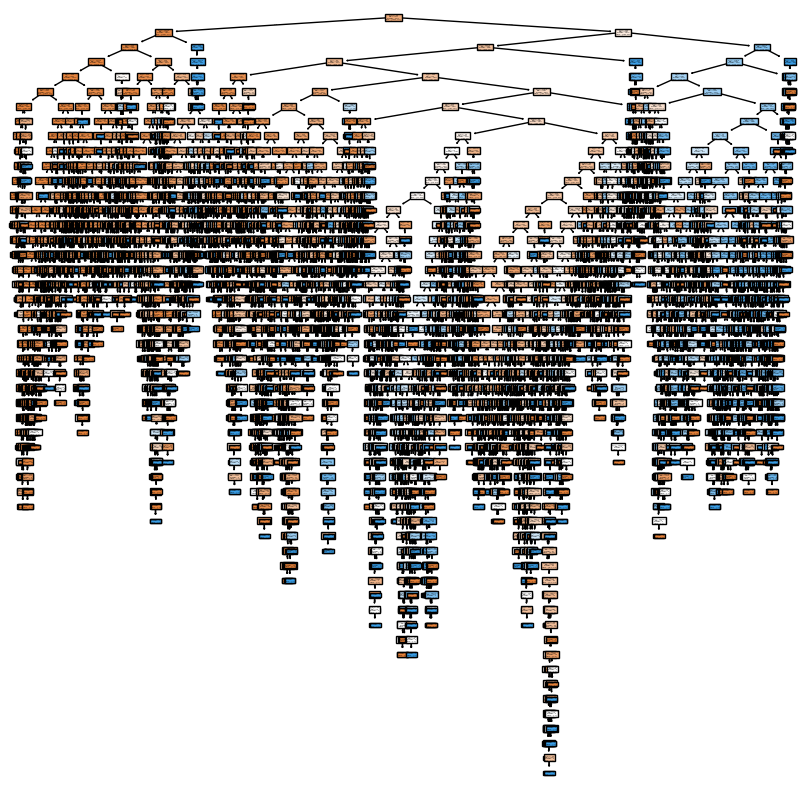

In [56]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf, filled=True)
plt.show()

### Test the model

In [57]:
test_pred = clf.predict(test_input)

In [58]:
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

       False       0.87      0.87      0.87     11360
        True       0.60      0.61      0.61      3700

    accuracy                           0.80     15060
   macro avg       0.74      0.74      0.74     15060
weighted avg       0.81      0.80      0.80     15060



#### Pruning

In [59]:
clf = tree.DecisionTreeClassifier(random_state=365, ccp_alpha=0.001)

In [61]:
clf.fit(train_input, train_target)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,365
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


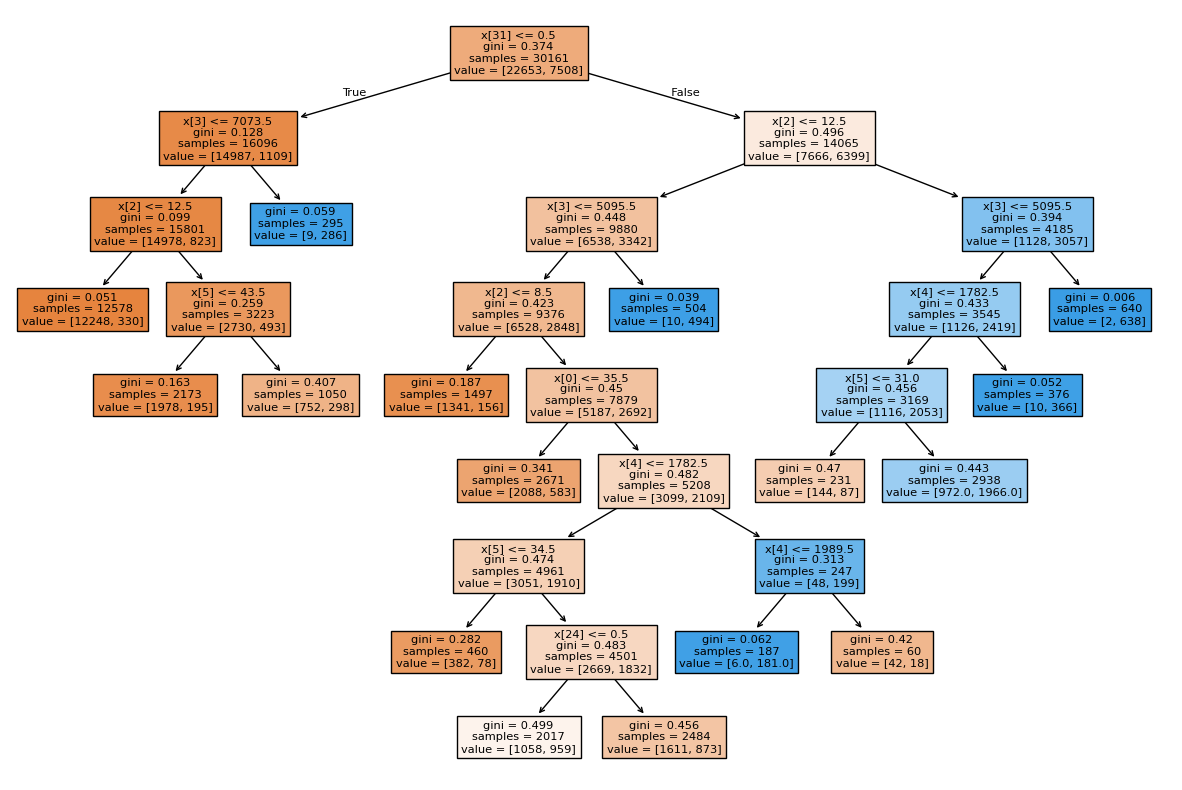

In [63]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True)
plt.show()

In [64]:
test_pred = clf.predict(test_input)

In [65]:
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

       False       0.86      0.96      0.90     11360
        True       0.79      0.51      0.62      3700

    accuracy                           0.85     15060
   macro avg       0.82      0.73      0.76     15060
weighted avg       0.84      0.85      0.83     15060



### Create and train the model

In [70]:
clf = RandomForestClassifier(random_state=365)

In [71]:
clf.fit(train_input, train_target)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Test the model

In [72]:
test_pred = clf.predict(test_input)

In [73]:
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

       False       0.88      0.92      0.90     11360
        True       0.72      0.61      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060



In [74]:
clf = RandomForestClassifier(random_state=365, n_estimators=150)

In [75]:
clf.fit(train_input, train_target)

,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [76]:
test_pred = clf.predict(test_input)

In [77]:
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

       False       0.88      0.92      0.90     11360
        True       0.72      0.62      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060



In [78]:
clf = RandomForestClassifier(random_state=365, ccp_alpha=0.0001)

In [79]:
clf.fit(train_input, train_target)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [80]:
test_pred = clf.predict(test_input)

In [81]:
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

       False       0.88      0.94      0.91     11360
        True       0.77      0.62      0.68      3700

    accuracy                           0.86     15060
   macro avg       0.83      0.78      0.80     15060
weighted avg       0.86      0.86      0.86     15060

